解压zip...完成.


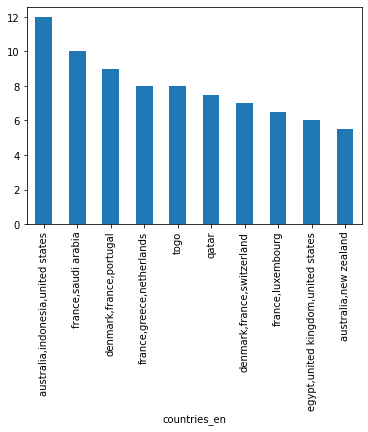

In [2]:
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt


def unzip(zip_filepath, dest_path):
    """
        解压zip文件
    """
    with zipfile.ZipFile(zip_filepath) as zf:
        zf.extractall(path=dest_path)


def get_dataset_filename(zip_filepath):
    """
            获取数据库文件名
    """
    with zipfile.ZipFile(zip_filepath) as zf:
        return zf.namelist()[0]


def run_main():
    """
        主函数
    """
    # 声明变量
    dataset_path = './data'  # 数据集路径
    zip_filename = 'open-food-facts.zip'  # zip文件名
    zip_filepath = os.path.join(dataset_path, zip_filename)  # zip文件路径
    dataset_filename = get_dataset_filename(zip_filepath)  # 数据集文件名（在zip中）
    dataset_filepath = os.path.join(dataset_path, dataset_filename)  # 数据集文件路径

    print('解压zip...', end='')
    unzip(zip_filepath, dataset_path)
    print('完成.')

    # 读取数据
    data = pd.read_csv(dataset_filepath, usecols=['countries_en', 'additives_n'])

    # 分析各国家食物中的食品添加剂种类个数
    # 1. 数据清理
    # 去除缺失数据
    data = data.dropna()    # 或者data.dropna(inplace=True)

    # 将国家名称转换为小写
    # 课后练习：经过观察发现'countries_en'中的数值不是单独的国家名称，
    # 有的是多个国家名称用逗号隔开，如 Albania,Belgium,France,Germany,Italy,Netherlands,Spain
    # 正确的统计应该是将这些值拆开成多个行记录，然后进行分组统计
    data['countries_en'] = data['countries_en'].str.lower()

    # 2. 数据分组统计
    country_additives = data['additives_n'].groupby(data['countries_en']).mean()

    # 3. 按值从大到小排序
    result = country_additives.sort_values(ascending=False)

    # 4. pandas可视化top10
    result.iloc[:10].plot.bar()
    plt.show()

    # 5. 保存处理结果
    result.to_csv('./country_additives.csv')

    # 删除解压数据，清理空间
    if os.path.exists(dataset_filepath):
        os.remove(dataset_filepath)

if __name__ == '__main__':
    run_main()
